<h1>Big Mart Prediction</h1>

<strong>Member:</strong>
  - Hồ Thanh Duy 21110759
  - Nguyễn Phước Trường 21110809
  - Đặng Trung Phương 21110

<h3>1. Overview about dataset</h3>

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 

<b>The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.</b>

| Variables | Descripions |
|-------|-------|
|   Item_Identifier   |  Unique product ID  |
|   Item_Weight   |   Weight of product   |
|  Item_Fat_Content  |   Whether the product is low fat or not   |
|   Item_Visibility   |   The % of total display area of all products in a store allocated to the particular product  |
|  Item_Type  |   The category to which the product belongs   |
|  Item_MRP  |   Maximum Retail Price (MRP) of the product   |
|   Outlet_Identifier   |   Unique store ID   |
|   Outlet_Establishment_Year   |   The year in which store was establiished   |
|   Outlet_Size   |   The size of the store in terms of ground area covered   |
|   Outlet_Location_Type   |   The type of city in which the store is located   |
|   Outlet_Type   |   Whether the outlet is just a grocery store or some sort of supermarket   |
|   Item_Outlet_Sales   |   Sales of a product at a specific store.   |



Link to this project dataset: https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets/data

<h4>1.1. Import modules</h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from scipy.stats import norm
%matplotlib inline
warnings.filterwarnings('ignore')

<strong><p>Explanation about library using on this project</p></strong>

+ `pandas` - used to perform data manipulation and analysis

+ `numpy` - used to perform a wide variety of mathematical operations on arrays

+ `matplotlib` - used for data visualization and graphical plotting

+ `seaborn` - built on top of matplotlib with similar functionalities

+ `%matplotlib` - to enable the inline plotting.

+ `scipy` - used for scientific and technical computing

+ `warnings` - to manipulate warnings details

+ `filterwarnings('ignore')` is to ignore the warnings thrown by the modules (gives clean results)



<h4>1.2. Loading the dataset</h4>

In [2]:
train = pd.read_csv('./data/train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<strong><p>Evaluate dataset:</p></strong>

+ `Item_Visibility` has a <i>value = 0</i> as values which have no meaning

+ `Item_Identifier` is a character string with some specific code used by the bigmart 

+ `Outlet_Size` contains some missing values as well


In [3]:
test = pd.read_csv('./data/test.csv')

In [4]:
print("Train : ", train.shape)
print("Test : ", test.shape)

Train :  (8523, 12)
Test :  (5681, 11)


In [5]:
# datatype of attributes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# To look at the unique observations from each of the features
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

<h3>2. Preprocessing dataset</h3>

In [7]:
# To check if there are any null values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Total percentage of the missing values
missing_data = train.isnull().sum()
total_percentage = (missing_data.sum()/train.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 45.44%


In [9]:
total = train.isnull().sum().sort_values(ascending=False)
percent_total = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]

missing_data

,Total,Percentage
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317


<strong><p>Evaluate dataset:</p></strong>

`Item_Weight` and `Outlet_Size` is two attributes with many missing values with:

+ Outlet_Size - <b>28.276428</b> %

+ Item_Weight - <b>17.165317</b> %

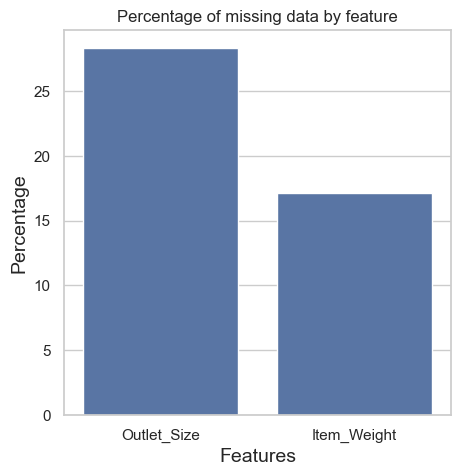

In [10]:
# Plotting the percentage of missing values
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [11]:
# Filling the null values with the mean value
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# Mapping the categorical values and then replacing it with the median value
train['Outlet_Size'] = train['Outlet_Size'].map({'Small':1, 'Medium':2, 'High':3})

print("The median value : ", train['Outlet_Size'].median())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].median())

#To check if there are any null values
train.isnull().sum()

The median value :  2.0


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
# Replacing it back into categorical values
train['Outlet_Size'] = train['Outlet_Size'].replace(1.000000,'Small')
train['Outlet_Size'] = train['Outlet_Size'].replace(2.000000,'Medium')
train['Outlet_Size'] = train['Outlet_Size'].replace(3.000000,'High')

In [14]:
# Changing the data type of establishment year into a object, as the years are not representing any numerical values but categorical
train['Outlet_Establishment_Year']  = train['Outlet_Establishment_Year'].astype('object')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 799.2+ KB


In [15]:
# The minimum value of the item visibility feature is zero(0)
# Replacing the minimum value with the 2nd minimum value of the feature, as item visibility cannot be zero
train['Item_Visibility'] = train['Item_Visibility'].replace(0.000000,0.003574698)

In [16]:
# Statistical description of the data
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066353,140.992782,2181.288914
std,4.226124,0.051321,62.275067,1706.499616
min,4.555000,0.003575,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


<h3>3. Data visualization and Cleaning</h3>

<h4>3.1. Item_Outlet_Sales</h4>

<Axes: title={'center': 'Box-plot of Item outlet sales'}, xlabel='Item_Outlet_Sales'>

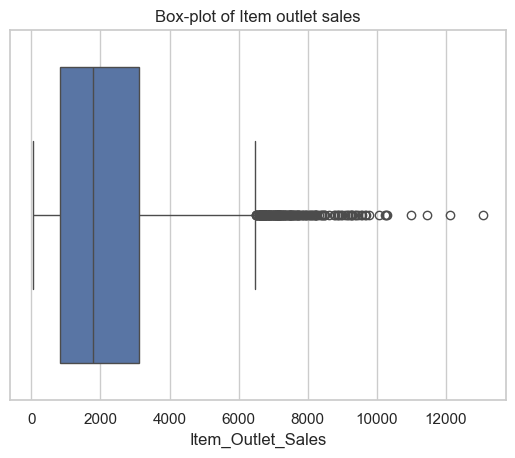

In [17]:
# Detecting the outliers and then removing it 
plt.title('Box-plot of Item outlet sales')
sns.boxplot(x='Item_Outlet_Sales', data=train)

<strong><p>Evaluate result:</p></strong>

The outliers in the `Item_Outlet_Sales` features are from 6250. Hence including only those observations which has values < 6250

In [18]:
train=train[train['Item_Outlet_Sales']<6250]

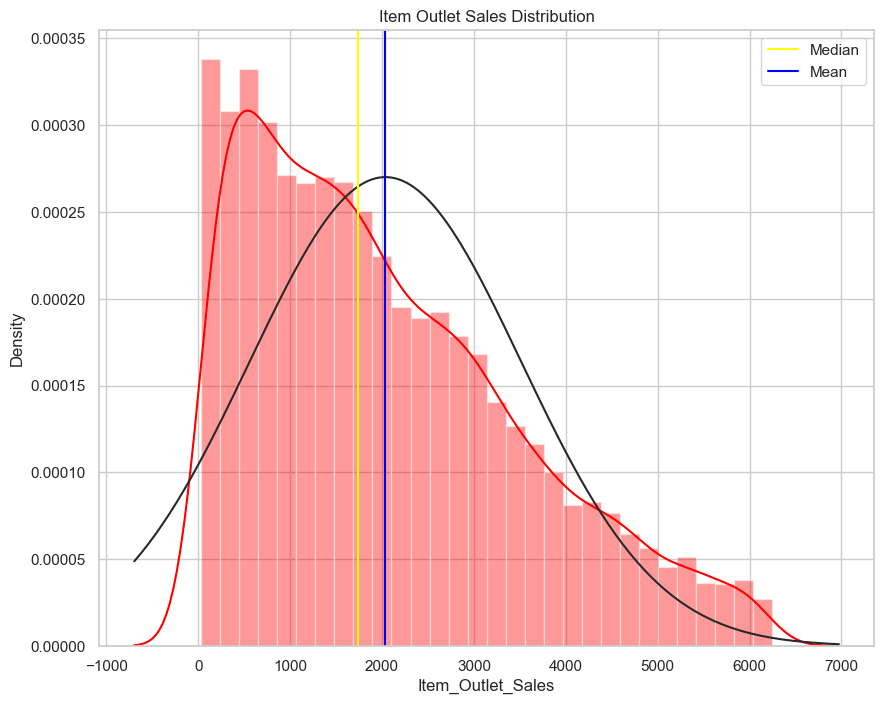

In [19]:
# Plotting the distribution of the feature
plt.figure(figsize=(10,8))
sns.distplot(train['Item_Outlet_Sales'], fit = norm, color='red')
plt.title('Item Outlet Sales Distribution')
plt.axvline(train['Item_Outlet_Sales'].median(),color='yellow',label='Median')
plt.axvline(train['Item_Outlet_Sales'].mean(),color='blue',label='Mean')
plt.legend()

<strong><p>Evaluate schema:</p></strong>

+ The distribution is positively skewed which says some of the items have sales less then the mean value.

+ The distribution curve is platykurtic which tells that it is less prone to the outliers.

<h4>Result after removing the outliers</h4>

<Axes: title={'center': 'Box-plot of Item outlet sales after removing the outliers'}, xlabel='Item_Outlet_Sales'>

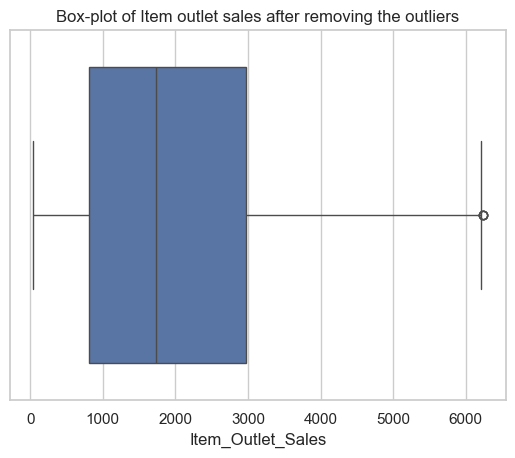

In [20]:
plt.title('Box-plot of Item outlet sales after removing the outliers')
sns.boxplot(x='Item_Outlet_Sales',data=train)

<h4>3.2. Item_Visibility</h4>

<Axes: title={'center': 'Box-plot of Item visibilty'}, xlabel='Item_Visibility'>

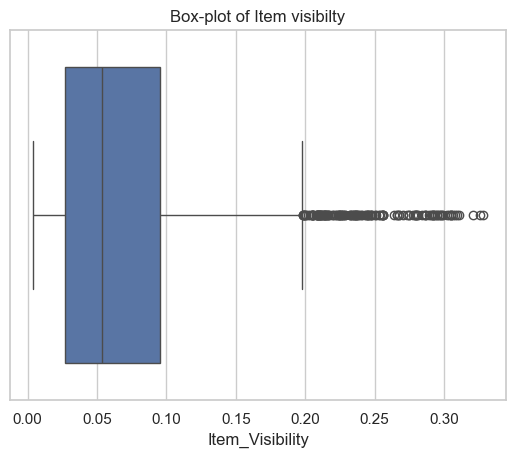

In [21]:
plt.title('Box-plot of Item visibilty')
sns.boxplot(x='Item_Visibility',data=train)

<strong><p>Evaluate result:</p></strong>

The outliers in the Item outlet sales features are from 0.195. Hence including only those observations which has values < 0.195

In [22]:
train=train[train['Item_Visibility']<0.195]

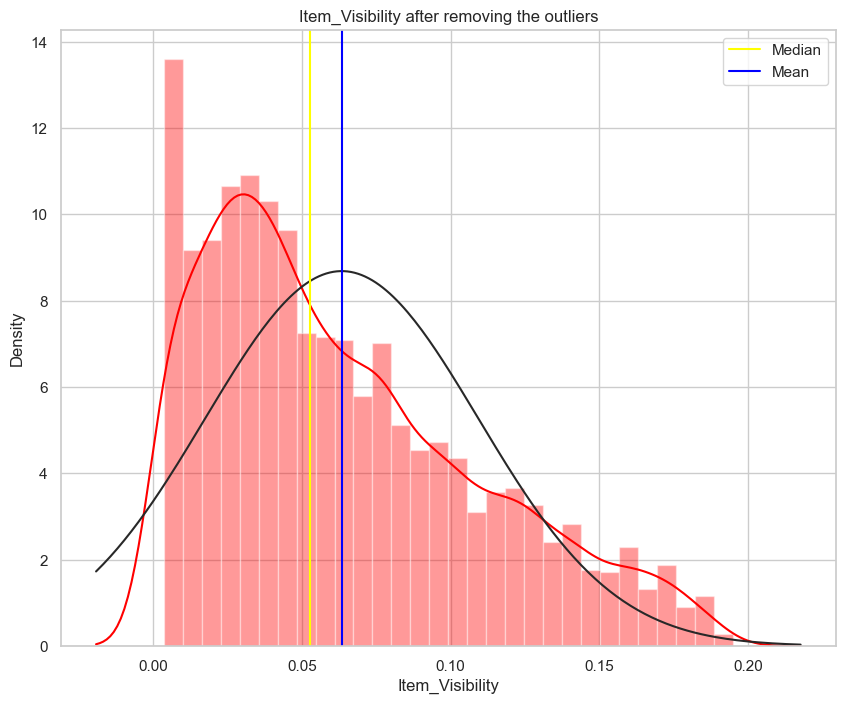

In [23]:
plt.figure(figsize=(10,8))
sns.distplot(train['Item_Visibility'], fit = norm, color='red')
plt.title('Item_Visibility after removing the outliers')
plt.axvline(train['Item_Visibility'].median(),color='yellow',label='Median')
plt.axvline(train['Item_Visibility'].mean(),color='blue',label='Mean')
plt.legend()

<strong><p>Evaluate schema:</p></strong>

+ The distribution is positively skewed which says some of the items are less visible then the mean value.

+ The distribution curve is platykurtic which tells that it is less prone to the outliers.

<h4>Result after removing the outliers</h4>

<Axes: title={'center': 'Box-plot of Item visibilty after removing the outliers'}, xlabel='Item_Visibility'>

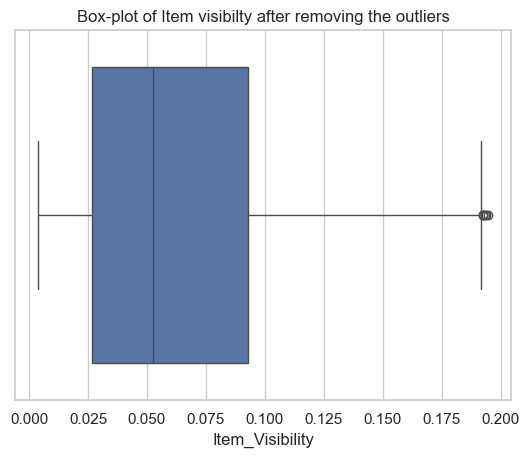

In [24]:
plt.title('Box-plot of Item visibilty after removing the outliers')
sns.boxplot(x='Item_Visibility',data=train)

<h4>3.3. Item_MRP</h4>

<Axes: title={'center': 'Box-plot of Item MRP'}, xlabel='Item_MRP'>

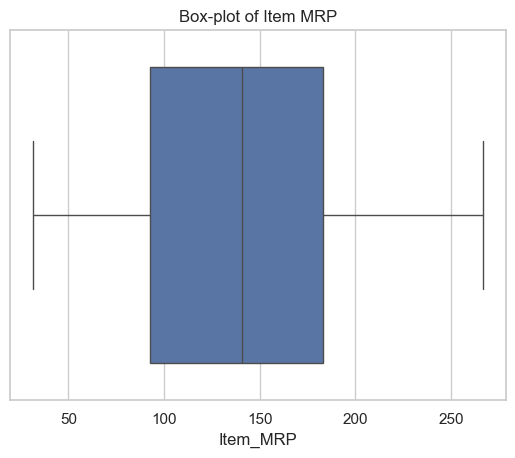

In [25]:
plt.title('Box-plot of Item MRP')
sns.boxplot(x='Item_MRP',data=train)

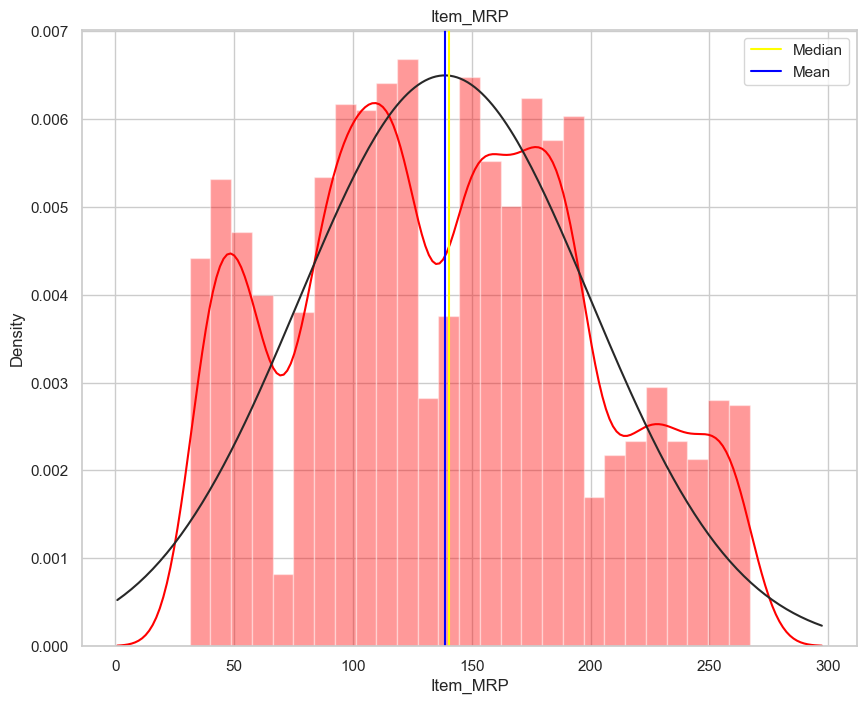

In [26]:
plt.figure(figsize=(10,8))
sns.distplot(train['Item_MRP'], fit = norm, color = 'red')
plt.title('Item_MRP')
plt.axvline(train['Item_MRP'].median(),color='yellow',label='Median')
plt.axvline(train['Item_MRP'].mean(),color='blue',label='Mean')
plt.legend()

<strong><p>Evaluate schema:</p></strong>

The distribution looks symmetric as the mean and the median value are almost same

<h4>3.4. Item_Weight</h4>

<Axes: title={'center': 'Box-plot of Item weight'}, xlabel='Item_Weight'>

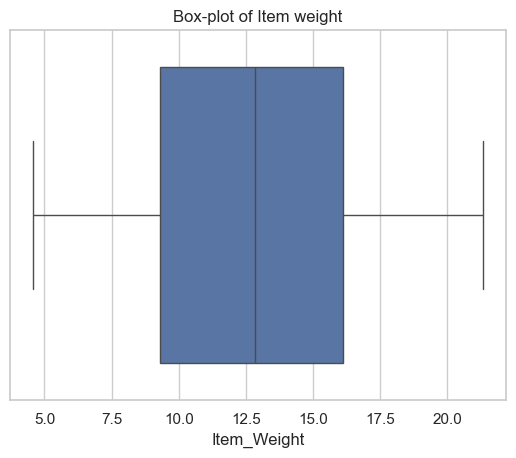

In [27]:
plt.title('Box-plot of Item weight')
sns.boxplot(x='Item_Weight',data=train)

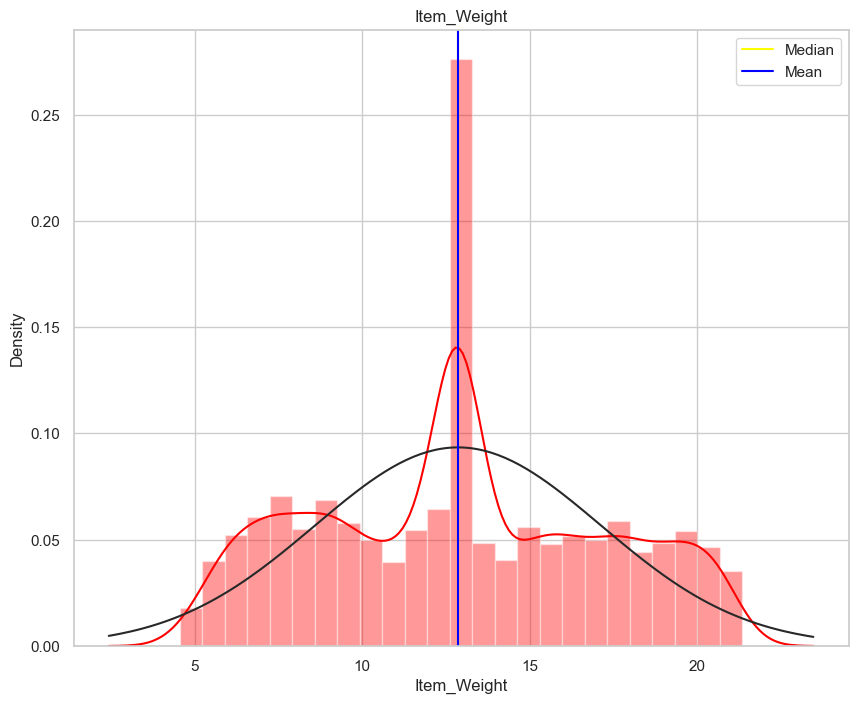

In [28]:
plt.figure(figsize=(10,8))
sns.distplot(train['Item_Weight'], fit = norm, color = 'red')
plt.title('Item_Weight')
plt.axvline(train['Item_Weight'].median(),color='yellow',label='Median')
plt.axvline(train['Item_Weight'].mean(),color='blue',label='Mean')
plt.legend()

<strong><p>Evaluate schema:</p></strong>

The distribution looks symmetric as the mean and the median value are same

<h4>3.5. Item_Fat_Content</h4>

In [29]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    4871
Regular    2753
LF          302
reg         115
low fat     106
Name: count, dtype: int64

In [30]:
# The values LF, low fat and Low Fat are same, similarly reg and Regular. Hence replacing it to avoid confusion
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('low fat', 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('LF', 'Low Fat')

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

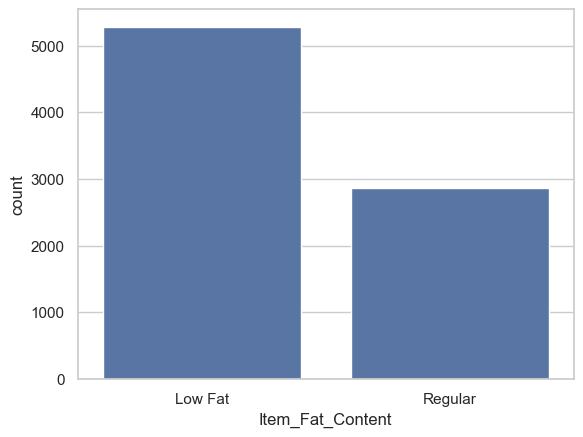

In [31]:
# Low Fat product has great count which that those product has high preferences
sns.countplot(x=train['Item_Fat_Content'])

<h4>3.6. Item_Type</h4>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

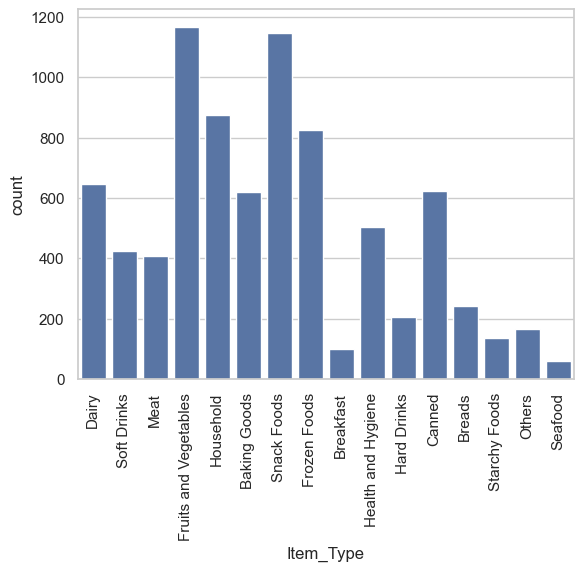

In [32]:
# Fruits and vegetables, Snacks have a great count which says that there is a good demand of these products
sns.countplot(x=train['Item_Type'])
plt.xticks(rotation=90)

<h4>3.7. Outlet_Establishment_Year</h4>

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '1985'),
  Text(1, 0, '1987'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2002'),
  Text(6, 0, '2004'),
  Text(7, 0, '2007'),
  Text(8, 0, '2009')])

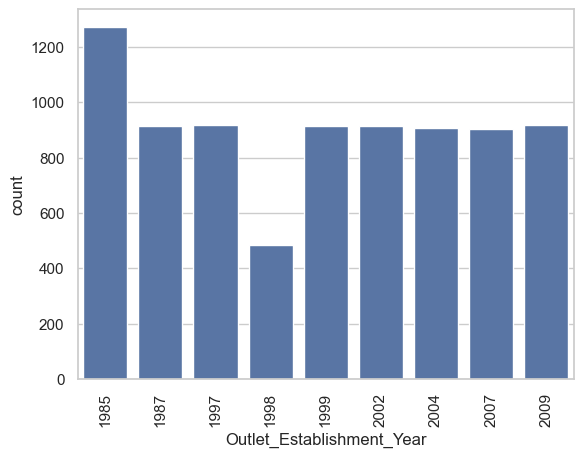

In [33]:
sns.countplot(x=train['Outlet_Establishment_Year'])
plt.xticks(rotation=90)

<h4>3.8. Outlet_Identifier</h4>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

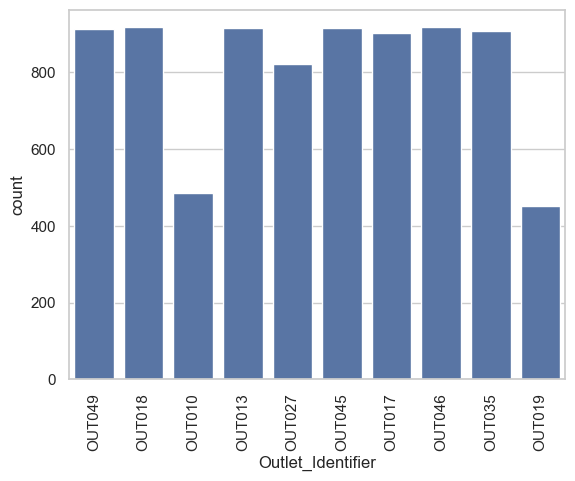

In [34]:
sns.countplot(x=train['Outlet_Identifier'])
plt.xticks(rotation=90)

<h4>3.9. Outlet_Size</h4>

([0, 1, 2], [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

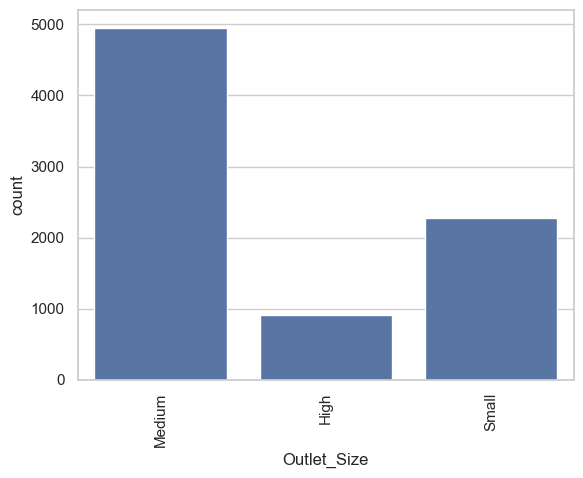

In [35]:
sns.countplot(x=train['Outlet_Size'])
plt.xticks(rotation=90)

<h4>3.10. Outlet_Location_Type</h4>

([0, 1, 2], [Text(0, 0, 'Tier 1'), Text(1, 0, 'Tier 3'), Text(2, 0, 'Tier 2')])

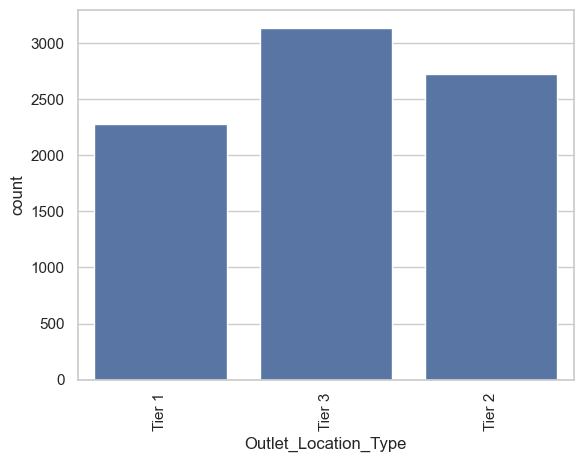

In [36]:
sns.countplot(x=train['Outlet_Location_Type'])
plt.xticks(rotation=90)

<h4>3.11. Outlet_Type</h4>

([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

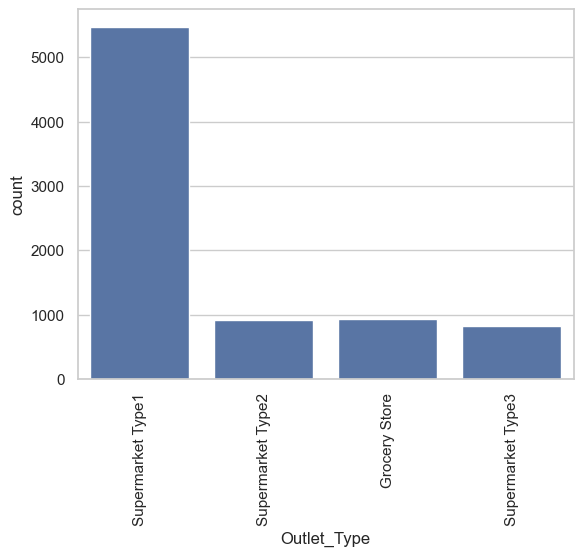

In [37]:
sns.countplot(x=train['Outlet_Type'])
plt.xticks(rotation=90)

<h3>4. Exploratory Data Analysis (EDA)</h3>

<Axes: >

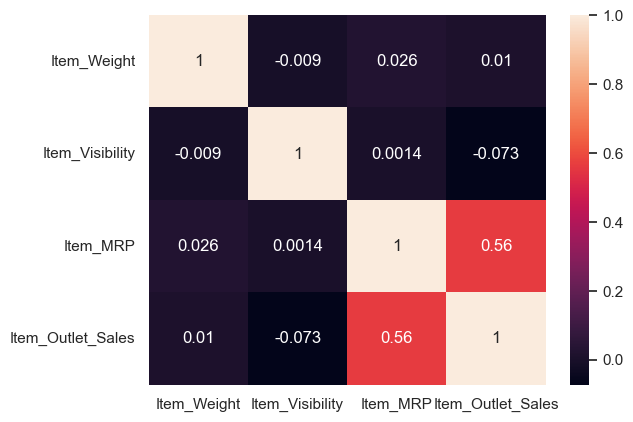

In [38]:
numerical_cols = train.select_dtypes(include=[np.number])
sns.heatmap(numerical_cols.corr(), annot=True)

<strong><p>Evaluate schema:</p></strong>

+ Item MRP and Item outlet sales shows high positive correlation which tells that as the MRP of the item increases the sales of that item also increases.

+ Similarly we can also notice that the item visibility and item outlet sales are negatively correlated which means that if the item is less visible then the sale of the item is more or if the item is more visible then the sale of the item is less..

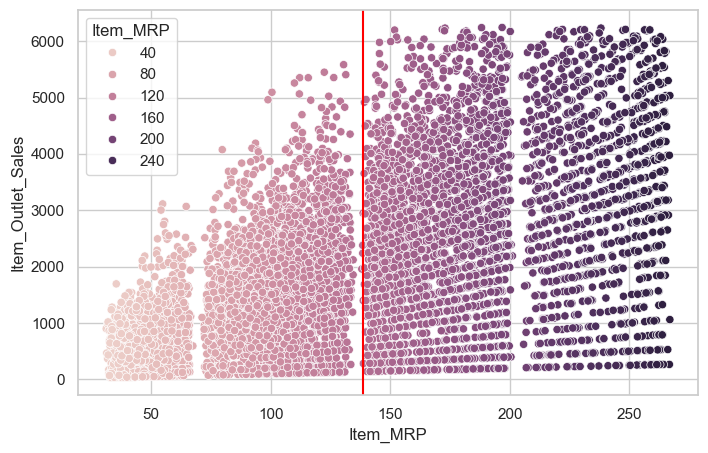

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_MRP',data=train)
plt.axvline(train['Item_MRP'].mean(),color='red',label='Mean')

<strong><p>Evaluate schema:</p></strong>

+ By looking at the plot we can say that if the MRP is high, then the sales are high.

+ If an item has MRP more then the mean value then the its sales are higher.

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

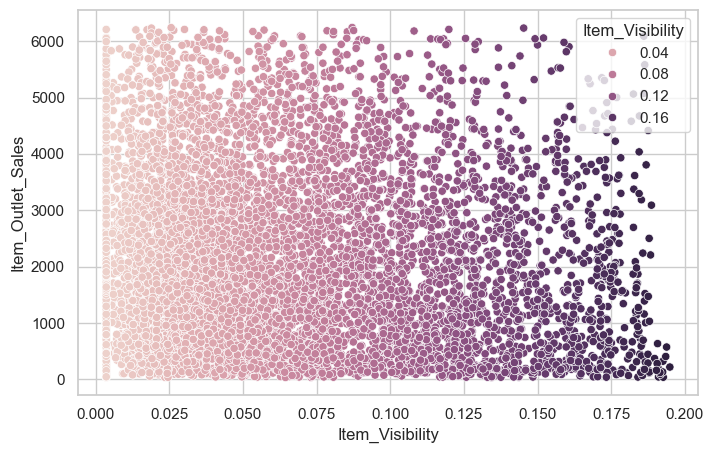

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Visibility', data=train,)

<strong><p>Evaluate schema:</p></strong>

+ If the item visibility is less then 0.100, the sales are higher.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

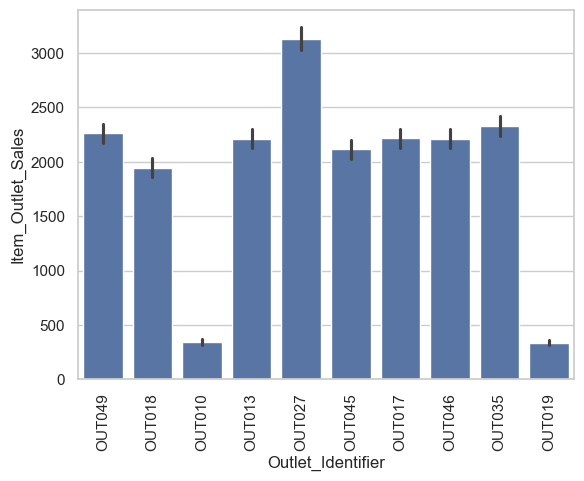

In [41]:
sns.barplot(x=train['Outlet_Identifier'], y=train['Item_Outlet_Sales'])
plt.xticks(rotation=90)

In [42]:
# After the removal of outliers
train.shape

(8147, 12)

<strong><p>Evaluation each features with Item_Outlet_Sales</p></strong>

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

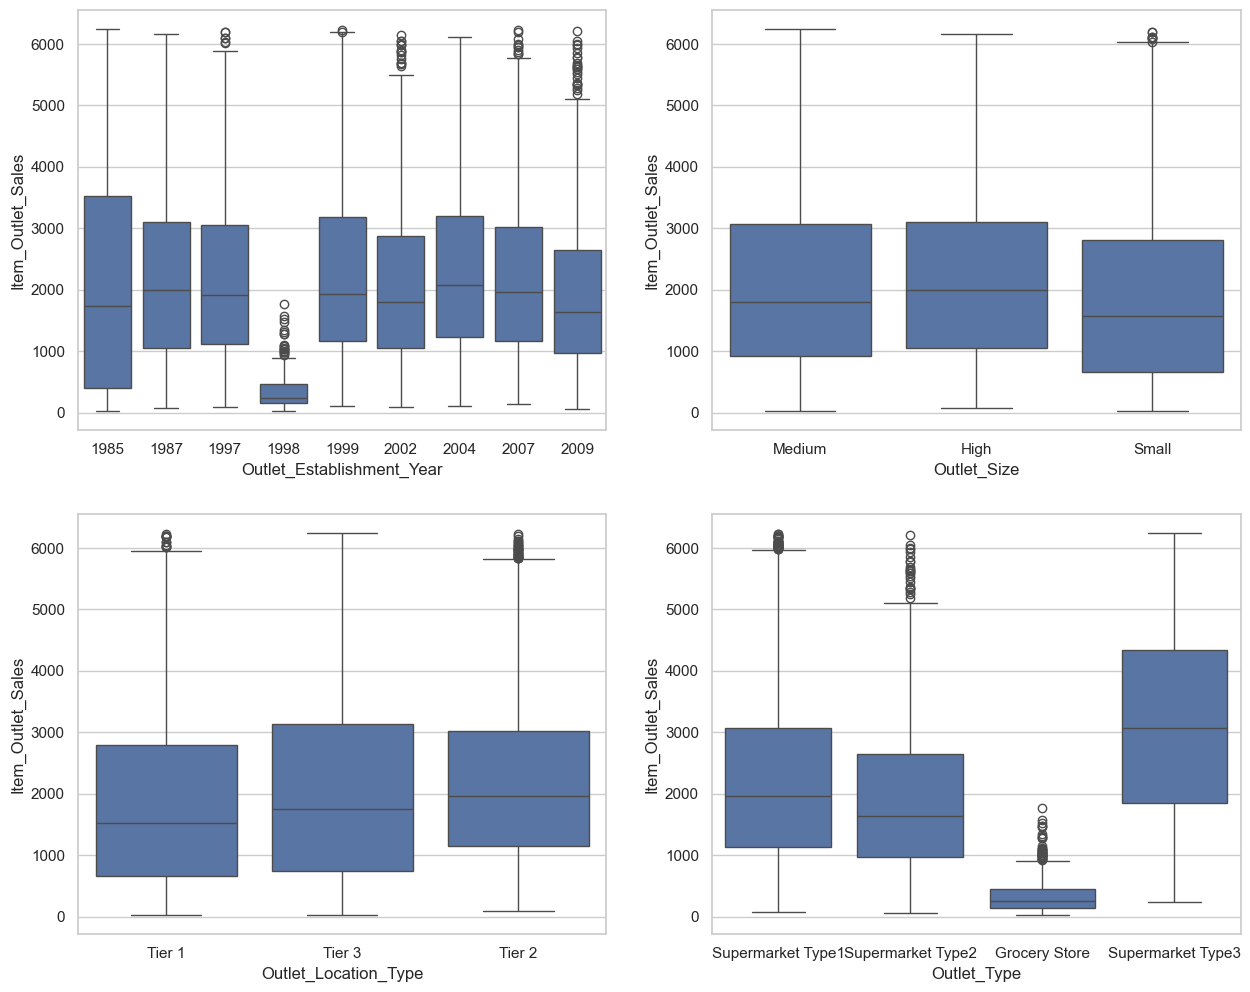

In [43]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=train)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=train)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=train)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=train)

<strong><p>Evaluate schema:</p></strong>

+ Outlet OUT1027 have higher sales.

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

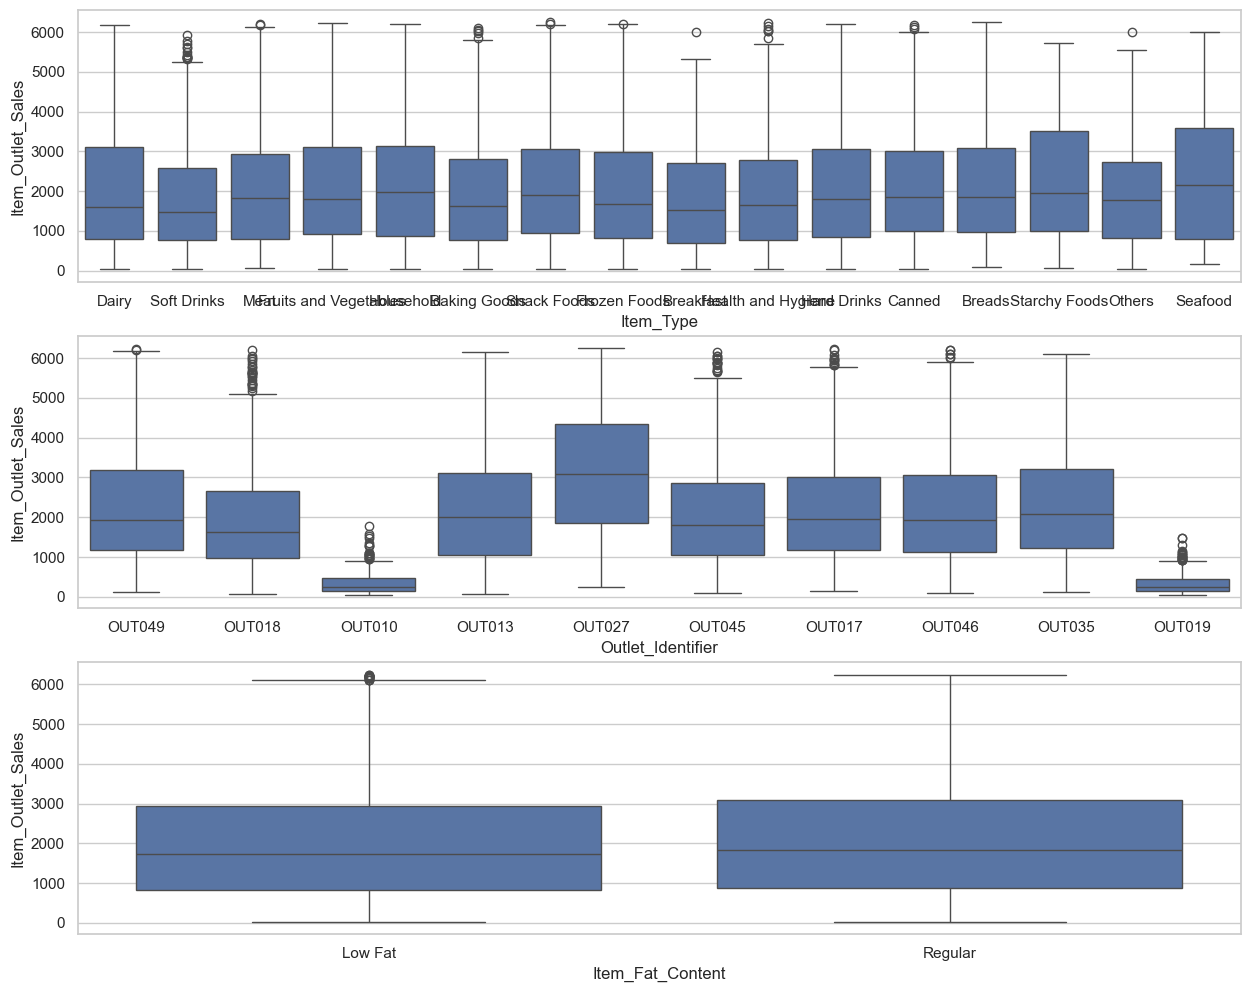

In [44]:
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[0],data=train)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[1],data=train)
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',ax=axes[2],data=train)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8147 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8147 non-null   object 
 1   Item_Weight                8147 non-null   float64
 2   Item_Fat_Content           8147 non-null   object 
 3   Item_Visibility            8147 non-null   float64
 4   Item_Type                  8147 non-null   object 
 5   Item_MRP                   8147 non-null   float64
 6   Outlet_Identifier          8147 non-null   object 
 7   Outlet_Establishment_Year  8147 non-null   object 
 8   Outlet_Size                8147 non-null   object 
 9   Outlet_Location_Type       8147 non-null   object 
 10  Outlet_Type                8147 non-null   object 
 11  Item_Outlet_Sales          8147 non-null   float64
dtypes: float64(4), object(8)
memory usage: 827.4+ KB


In [46]:
# Mapping the binary features
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'Low Fat': 1, 'Regular': 0})

In [47]:
# Creating dummy variables of all the other categorical features
Itemtype = pd.get_dummies(train['Item_Type'],prefix='ItemType',drop_first=True)
train = pd.concat([train,Itemtype],axis=1)

OutID = pd.get_dummies(train['Outlet_Identifier'],prefix='OutIden',drop_first=True)
train = pd.concat([train,OutID],axis=1)

OutLoctype = pd.get_dummies(train['Outlet_Location_Type'],prefix='OutLocTy',drop_first=True)
train = pd.concat([train,OutLoctype],axis=1)

Outtype = pd.get_dummies(train['Outlet_Type'],prefix='OutTy',drop_first=True)
train = pd.concat([train,Outtype],axis=1)

OutSz = pd.get_dummies(train['Outlet_Size'],prefix='OutSz',drop_first=True)
train = pd.concat([train,OutSz],axis=1)

OutEYr = pd.get_dummies(train['Outlet_Establishment_Year'],prefix='OutEstYear',drop_first=True)
train = pd.concat([train,OutEYr],axis=1)

In [48]:
train.drop(['Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Outlet_Size','Outlet_Establishment_Year'],axis=1,inplace=True)

In [49]:
X = train.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

y = train['Item_Outlet_Sales']

In [50]:
X.shape

(8147, 43)

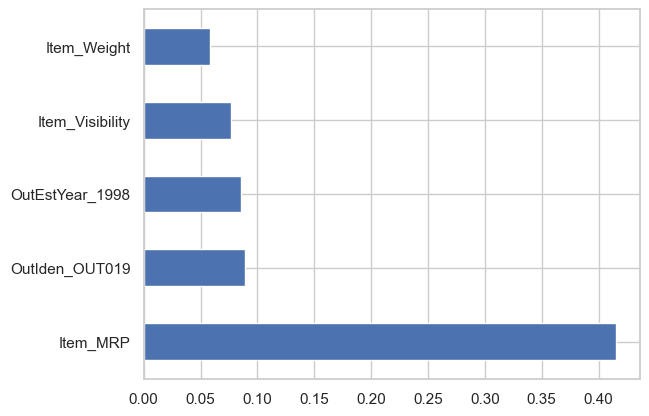

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

# To look at the best features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

+ The Item MRP, Item Visibility and Item weight are the best features including Outlet OUT019 and Outlet Established in 1998.

<strong>Spliting our data into train and test</strong>

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<h3>5. Model building</h3>

<strong>Linear Regression</strong>

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_linreg = lin_reg.predict(x_test)

In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

MSE=mean_squared_error(y_test,y_linreg)
MAE=mean_absolute_error(y_test,y_linreg)
r2=r2_score(y_test,y_linreg)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.552460060892948
Root Mean Squared Error :  1005.8146641606979
Mean Absolute Error :  777.538977475724


<strong>Random Forest Regression</strong>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


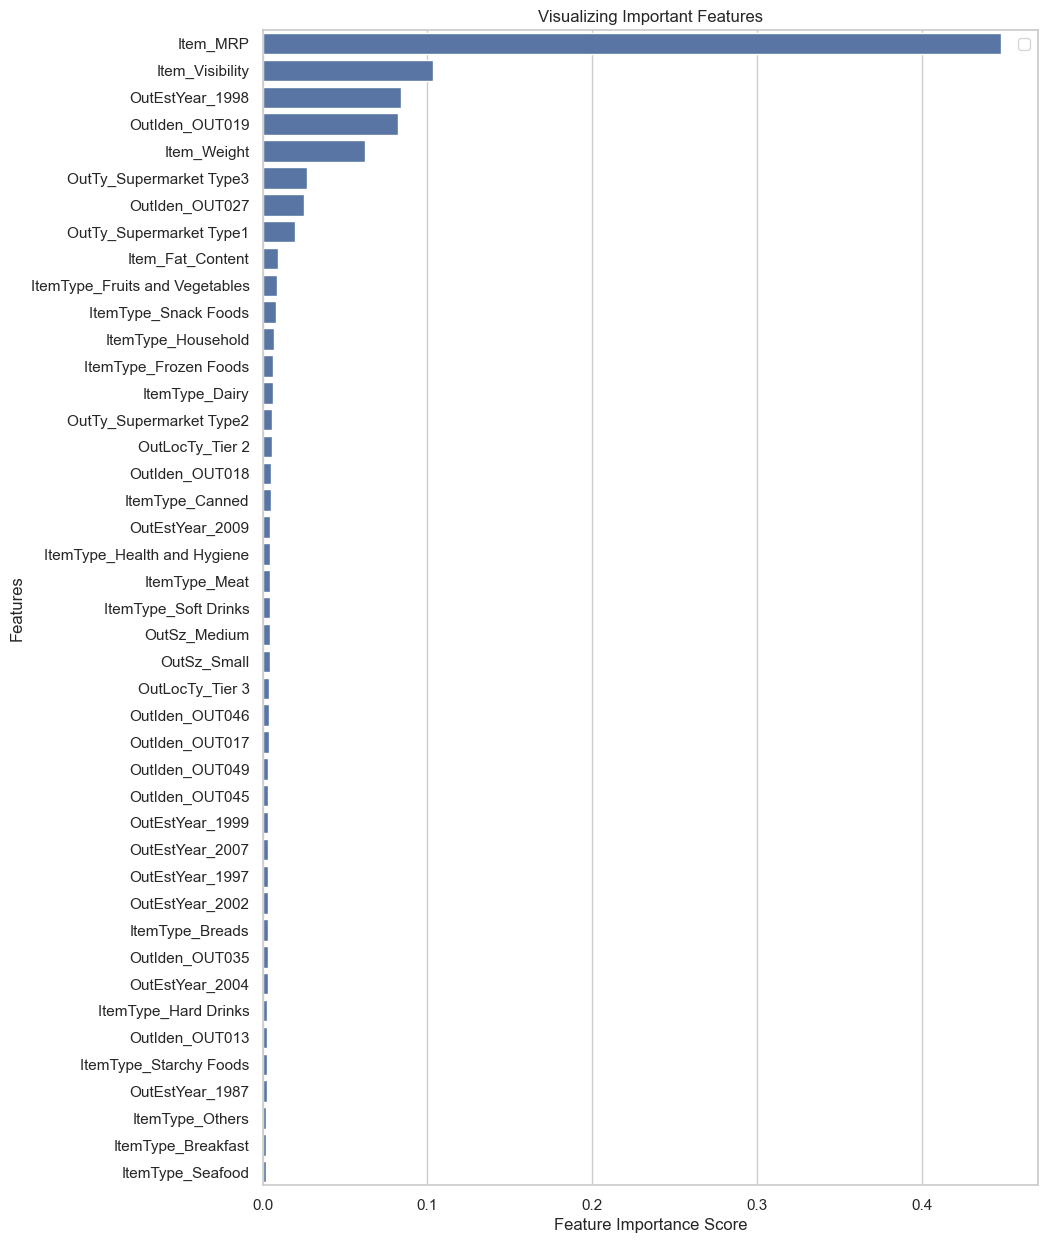

In [55]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=100)
reg.fit(x_train,y_train)

feature_imp = pd.Series(reg.feature_importances_,index=x_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,15))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [56]:
rfr_reg=RandomForestRegressor(n_estimators=200)
rfr_reg.fit(x_train,y_train)

y_rfreg = rfr_reg.predict(x_test)

In [57]:
MSE=mean_squared_error(y_test,y_rfreg)
MAE=mean_absolute_error(y_test,y_rfreg)
r2=r2_score(y_test,y_rfreg)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.5505647925008854
Root Mean Squared Error :  1007.9421556102394
Mean Absolute Error :  741.7615611012269


<strong>Evaluate value</strong>

+ Comparing the 2 models we can say that the Random forest model is the best as it has good metrics value.

+ For predicting the test data, we will use both the models.

<h3>6. Test Phase</h3>